In [4]:
import numpy as np

# Define the environment
grid_size = 5
n_states = grid_size * grid_size
n_actions = 4  # Up, down, left, right

# Initialize reward matrix (goal: +10, pitfalls: -10, others: -1)
rewards = np.full((n_states,), -1)
rewards[24] = 10  # Goal at state 24 (bottom-right)
rewards[12] = -10  # Pitfall at state 12 (center)

In [6]:
def epsilon_greedy_action(Q_table, state, epsilon):
    # Epsilon-greedy strategy: with probability epsilon, take a random action (exploration)
    # otherwise take the action with the highest Q-value for the given state (exploitation)
    if np.random.rand() < epsilon:  # Exploration
        return np.random.randint(0, Q_table.shape[1])  # Random action
    else:  # Exploitation
        return np.argmax(Q_table[state])  # Action with the highest Q-value


alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate for epsilon-greedy policy

# Initialize the Q-table
Q_table = np.zeros((n_states, n_actions))

In [7]:
# Training loop
for episode in range(1000):
    state = np.random.randint(0, n_states)  # Start at random state
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)  # Random next state
        reward = rewards[next_state]

        # Q-learning update rule
        Q_table[state, action] = Q_table[state, action] + alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])

        state = next_state
        if next_state == 24 or next_state == 12:  # End episode if goal or pitfall is reached
            done = True


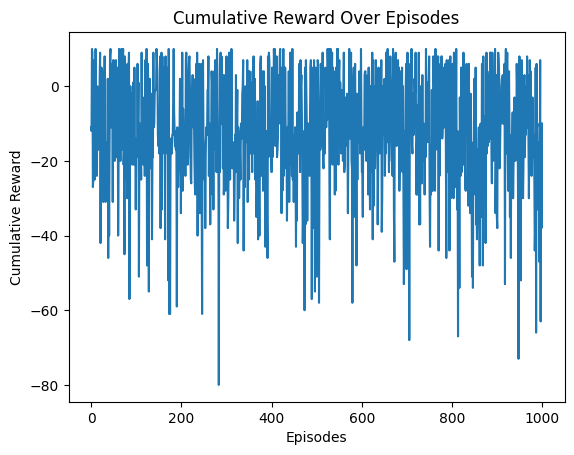

In [8]:
import matplotlib.pyplot as plt

# Calculate and store cumulative rewards
cumulative_rewards = []
for episode in range(1000):
    total_reward = 0
    state = np.random.randint(0, n_states)
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)
        reward = rewards[next_state]
        total_reward += reward
        state = next_state
        if next_state == 24 or next_state == 12:
            done = True
    cumulative_rewards.append(total_reward)

# Plot the cumulative rewards over episodes
plt.plot(cumulative_rewards)
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Episodes')
plt.show()

In [9]:
#Here, we see the agent's cumulative rewards are not improving much over time, which means it's not learning fast enough to avoid pitfalls and reach the goal more frequently. More hyperparameter tuning is required.

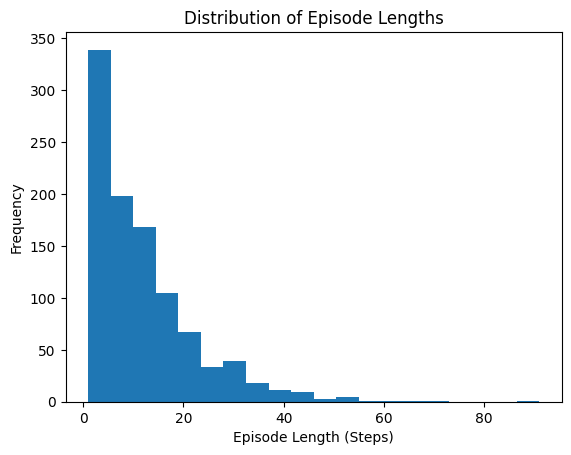

In [10]:
# Calculate and store episode lengths
episode_lengths = []
actions = []
for episode in range(1000):
    steps = 0
    state = np.random.randint(0, n_states)
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)

        next_state = np.random.randint(0, n_states)
        steps += 1
        state = next_state
        if next_state == 24 or next_state == 12:
            done = True
    episode_lengths.append(steps)

# Plot a histogram of episode lengths
plt.hist(episode_lengths, bins=20)
plt.xlabel('Episode Length (Steps)')
plt.ylabel('Frequency')
plt.title('Distribution of Episode Lengths')
plt.show()

In [11]:
# Redefine epsilon_greedy_action to log explorations & exploitations
actions = []
def epsilon_greedy_action(Q_table, state, epsilon):
    # Epsilon-greedy strategy: with probability epsilon, take a random action (exploration)
    # otherwise take the action with the highest Q-value for the given state (exploitation)
    if np.random.rand() < epsilon:  # Exploration
        actions.append('explore')
        return np.random.randint(0, Q_table.shape[1])  # Random action
    else:  # Exploitation
        actions.append('exploit')
        return np.argmax(Q_table[state])  # Action with the highest Q-value

# Calculate and store cumulative rewards and actions
cumulative_rewards = []
for episode in range(1000):
    total_reward = 0
    state = np.random.randint(0, n_states)
    done = False
    while not done:
        action = epsilon_greedy_action(Q_table, state, epsilon)
        next_state = np.random.randint(0, n_states)
        reward = rewards[next_state]
        total_reward += reward
        state = next_state
        if next_state == 24 or next_state == 12:
            done = True
    cumulative_rewards.append(total_reward)

# Calculate success rate
success_count = sum(1 for reward in cumulative_rewards if reward >= 10)
success_rate = success_count / len(cumulative_rewards)

# Exploration vs. exploitation ratio
#print(actions)
exploration_count = sum(1 for action in actions if action == 'explore')
exploitation_count = sum(1 for action in actions if action == 'exploit')
exploration_exploitation_ratio = exploration_count / (exploration_count + exploitation_count)

print(f"Success Rate: {success_rate * 100}%")
print(f"Exploration vs. Exploitation Ratio: {exploration_exploitation_ratio}")


Success Rate: 3.6999999999999997%
Exploration vs. Exploitation Ratio: 0.10047217276879016


In [13]:
# Mostly Exploiting Rather Than Exploring

In [14]:
# The success rate suggests that this model is not yet ready for deployment, and the exploration-exploitation ratio indicates that the model spends most of its time exploiting rather than exploring. Perhaps changing the hyperparameters with the goal of changing this ratio will help the model learn faster and improve its accuracy.